<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/LogisticRegression_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 쇼핑몰에서 럭키백을 판매하기로 하였고, 럭키백에는 생선 7가지가 랜덤하게 들어있다.

단, 럭키백에 확률이 표시되어야함.(들어있는 생선의 당첨확률)



In [63]:
# 럭키백의 확률
# 생선 7마리라고 가정
# 생선의 크기(Length), 무게(Weight), 두께(Width), 높이(Height), 대각선의 길이(Diagonal) 등

# K-최근접 알고리즘을 이용해보면 회귀??? 분류???
# 확률을 알고 싶은 것이기 떄문에 회귀 사용

# 샘플 10마리 중 농어 3마리이면 -> 3 / 10 = 0.3
# 빙어 5마리이면 -> 5 / 10 = 0.5
# 돔 2마리이면 -> 2 / 10 = 0.2

# 사이킷런의 K-최근접 이웃 분리기도 이와 동일한 방식으로 확률 계산도 해줌
# 샘플데이터 준비
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()    # 최상단 데이터 5개를 보여줌

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [64]:
print(pd.unique(fish['Species']))    # pandas의 .unique() 매서드를 사용하여 생선 종류만 출력
# Bream : 도미 / Roach : 잉어 / Whitefish : 송어 / Parkki : 붕어 / Perch : 농어 / Pike : 가물치 / Smelt : 빙어
# 총 7종류의 어종이 분포되어 있음

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [65]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()    # 분석용 입력값 생성
# 원하는 필드를 넣어 필터링
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [66]:
fish_target = fish['Species'].to_numpy()    # 정답 리스트 생성
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [67]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)
print(train_input.shape, test_input.shape)    # 훈련용은 119개의 샘플값과 5개의 특성, 테스트용은 40개의 샘플값과 5개의 특성을 갖음

(119, 5) (40, 5)


In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()    # sklearn을 이용한 전처리(스케일 조정 : 표준점수화)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])
print(test_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [69]:
# K-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)    # 참고이웃은 3개로 설정
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [70]:
# 전에는 0과 1을 찾는 이진분류였지만, 지금은 타겟에 7개의 어종을 넣은 상태임
print(kn.classes_)    # 어종 7가지 출력 / 2개 이상 클래스가 포함된 문제를 다중분류라고 함..

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [71]:
print(kn.predict(test_scaled[:5]))    # KNeighborsClassifier의 .predict() 메서드를 하여 Test_target 값을 확인

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [72]:
print(test_scaled[:5])

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [73]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])    # 사이킷런이 번거로운 연산을 수행해줌으로써 결과가 쉽게 나옴
print(np.round(proba, decimals = 4))    # 소숫점 4자리까지 표시(5자리에서 반올림)
# Bream / Parkki / Perch / Pike / Roach / Smelt / Whitefish 순으로 확률 표시
# 결과적으로 ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']로 판명됨

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [74]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 절차가 필요함
distances, indexes = kn.kneighbors(test_scaled[3:4])    # 4번째 값을 자세히 보면 됨
print(train_target[indexes])
# 출력 결과의 확률값
# [Bream  Parkki Perch  Pike   Roach  Smelt  Whitefish]
# [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# 이유 : n_neighbors = 3으로 설정했기 때문에 7개를 확률로 제공되지 못함

[['Roach' 'Perch' 'Perch']]


In [75]:
# 로지스틱 회귀(LogisticRegression)로 알고리즘 변경
# 로지스틱 회귀(LogisticRegression)는 sklearn에서 제공하며, 이름이 회귀이지만 분류 모델임
# 선형회귀와 동일하게 선형방정식을 학습함.
# 적용 공식 / z = (a * Weight) + (b * Length) + (c + Diagonal) + (d * Height) + (e * Width) + f
# a, b, c, d, e, f는 각 항목에 대한 가중치(중요도, 계수)임
# z는 어떤 값도 가능하나, 확률이 되려면 0 ~ 1 사이 값이어야함.
# z가 아주 큰 음수일때 0, 아주 큰 양수일 때 1이 되도록 바꾸는 방법에는 시그모이드 함수, 로지스틱 함수가 있음

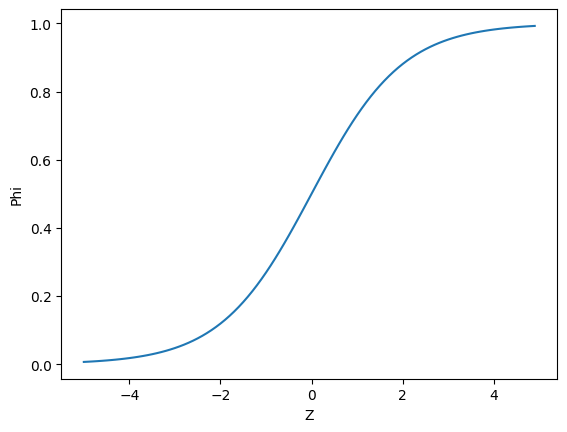

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용 : z가 무한하게 큰 음수일 경우 0에 가까워짐, z가 무한하게 큰 양수일 경우 1이 가까워짐
z = np.arange(-5, 5, 0.1)    # -5 ~ 5까지 0.1 간격으로 배열 생성
phi = 1 / (1 + np.exp(-z))    # np.exp() 함수로 시그모이드 적용

plt.plot(z, phi)
plt.xlabel('Z')
plt.ylabel('Phi')
plt.show()

In [77]:
# 선형방적식의 출력 z의 음수를 사용하여 자연상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
# 이렇게 하면 0 ~ 1사이 값을 확률(0 ~ 100%)로 해석가능

# 훈련 전 2진분류부터 학습
# 2진분류인 경우 시그모이드 함수 출력이 0.5보다 크면 양성, 0.5보다 작으면 음성으로 판단함
# 단, 딱 0.5가 나오면 사이킷런은 음성으로 판단함(0.5의 경우 라이브러리마다 판단 기준이 서로 판이함)

In [78]:
# 로지스틱 회귀로 2진분류 수행 테스트
# numpy 배열은 True, False 값을 전달하여 행을 선택할 수 있음(Boolean Indexing / 불리언 인덱싱)
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])    # Boolean Indexing / True값만 출력됨

['A' 'C']


In [79]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')    # 도미(Bream) or 빙어(Smelt)인 경우만 골라냄

# bream_smelt_indexes에는 도미 또는 빙어일 경우 True이고 나머지는 False가 들어있음
# 해당 배열을 이용하여 train_scaled, train_target 배열에 인덱싱을 적용하면 손쉽게 도미와 빙어 데이터만 골라낼 수 있음
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [80]:
# 사이킷런 선형모델의 로지스틱 회귀 클래스 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)    # 2진분류로 나옴

LogisticRegression()

In [81]:
# train_bream_smelt 첫 5개의 값으로 결론 확인
print(lr.predict(train_bream_smelt[:5]))    # 판독결과 : 도미 4마리, 빙어 1마리

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [82]:
print(lr.predict_proba(train_bream_smelt[:5]))    # 확률 확인

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [83]:
# 샘플마다 2개의 확률이 출력되는데(시그모이드 함수), 첫번째 열은 0(음성)에 대한 확률, 두번째 열은 1(양성)에 대한 확률임
# 사이킷런의 target값은 알파벳 순으로 정렬해서 사용
print(lr.classes_)    # Bream(도미)가 음성, Smelt(빙어)가 양성으로 사용됨
# 두번째 샘플만이 양성 클래스인 빙어일 확률이 높아 나머지는 도미로 예측됨
# 만약 Bream(도미)을 양성 클래스로 사용하고 싶으면 전처리 단계에서 Bream(도미)인 Target값을 1로 만들어야함

['Bream' 'Smelt']


In [84]:
# LogisticRegression(로지스틱회귀)으로 학습한 계수(중요도) 학습
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [85]:
# coef, intercept 값 : [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
# 해당 값을 선형방정식에 대입 / z = (a * Weight) + (b * Length) + (c + Diagonal) + (d * Height) + (e * Width) + f
# z = (-0.40451732 * Weight) + (-0.57582787 * Length) + (-0.66248158 * Diagonal) + (-1.01329614 * Height) + (-0.73123131 * Width) + (-2.16172774)

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)    # train_bream_smelt의 처음 5개의 z값 출력

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [86]:
# z 값을 시그모이드 함수에 통과시키면 확률을 도출해 낼 수 있음
# 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 존재함 -> expit()
from scipy.special import expit
print(expit(decisions))    # phi = 1 / (1 + np.exp(-z)) / 0에 가까우면 Bream(도미), 1에 가까우면 Smelt(빙어)

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [87]:
# 2진분류는 True, False로만 처리되므로 다중분류로 변경하여 진행
# 현재 어종이 7가지이므로 로지스틱 회귀로 분류를 학습
# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함(default : max_iter = 100)
# max_iter = 100으로 반복횟수를 100으로 하면 부족하다는 경고문구가 나와 1000으로 높여 적용
# LoigsticRegression은 기본적으로 Ridge 회귀와 같이 계수를 제곱하는 규제를 사용(L2 규제)
# Ridge 회귀에서는 alpha 매개변수로 규제의 양을 조절(alpha의 값과 규제의 양이 비례)
# LogisticRegression에서는 규제를 제어하는 변수가 C로 설정되어있음(C의 값과 규제의 양이 반비례 / C의 Default값 = 1)
# 그러므로 LogisticRegression에서 규제를 완화하여 사용하기 위해 C의 값을 20으로 증가시켜 사용

lr = LogisticRegression(C = 20, max_iter = 1000)    # 정확도 향상을 위해 max_iter를 1000으로 증가시켜 적용
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 결과 : 트레이닝값(93.3%) > 테스트값(92.5%) 이므로 과대적합은 아닌듯함

0.9327731092436975
0.925


In [88]:
print(lr.predict(test_scaled[:5]))    # 결과 분석 시 다중분류 방식으로 출력

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [89]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))
# 결과 / Bream, Parkki, Perch, Pike, Roach, Smelt, Whitefish 순 확률표시
# [0.    0.014 0.842 0.    0.135 0.007 0.003]
# [0.    0.003 0.044 0.    0.007 0.946 0.   ]
# [0.    0.    0.034 0.934 0.015 0.016 0.   ]
# [0.011 0.034 0.305 0.006 0.567 0.    0.076]
# [0.    0.    0.904 0.002 0.089 0.002 0.001]

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [90]:
print(lr.classes_)    # 어종 7가지가 알파벳 순으로 정렬 및 클래스가 명확하게 구분되어 출력됨

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [91]:
# 다중분류일때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) / 7개의 행과 5개의 특성이 사용됨
# (7,) / 7개의 행이 사용됨 -> 2진분류에서 보았던 z를 7개를 계산함
# 다중분류는 클래스마다 z값을 하나씩 계산하며, 가장 높은 z값을 출력하는 클래스가 예측클래스임

(7, 5) (7,)


In [92]:
# 2진분류에서는 시그모이드 함수를 사용하여 z 값을 0 ~ 1 사이값으로 변환하였으나,
# 다중분류에서는 소프트맥스 함수를 사용하여 7의 z 값을 확률로 변환함

# 소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7 + ..... + e^zi
# s1 = (e^z1 / e_sum).....s7 = (e^z7 / e_sum).....si = (e^zi / e_sum) -> s1 ~ s7까지 모두 더하면 분모가 같아져 1이 됨

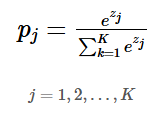

In [93]:
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1 ~ z7의 값\n")
for idx, z in enumerate(decision):
    print(f"{idx}번째 샘플의 z값\n{z}\n")

5개 샘플에 대한 z1 ~ z7의 값

0번째 샘플의 z값
[-6.50722814  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625859
 -0.62549704]

1번째 샘플의 z값
[-10.87900747   1.94410609   4.77600607  -2.42306183   2.98748716
   7.84171377  -4.24724379]

2번째 샘플의 z값
[-4.33809959 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431898
 -3.87182371]

3번째 샘플의 z값
[-0.69143994  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143404
  1.25700485]

4번째 샘플의 z값
[-6.40138612 -1.99137623  5.81526372 -0.134644    3.49905134 -0.08753485
 -0.69937385]



In [94]:
from scipy.special import softmax
print("소프트맥스 함수로 예측확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5, -1)
sm = softmax(decision, axis = 1).round(2) * 100
con = np.column_stack((sm, prd))
print(pd.DataFrame(con, columns = class_))


소프트맥스 함수로 예측확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
